# Introduction

From google playstore dataset, i decided to make some simple notebook for EDA and do some wrangling data for put it on my prediction model in future.

# Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/o (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for plot the graph
import seaborn as sns # used for plot interactive graph
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline

#  Data Collection

Data Collection is the process of gathering & mesuring data, information or any variable of interest in a standardized and established manner that enables the collecttion to answer or test hypothesis and evalute outcomes of the particular collection.

In [5]:
data = pd.read_csv(r'googleplaystore.csv', encoding = 'unicode_escape')
play=data
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite â FREE Live Cool Themes, Hid...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
data.shape

(10841, 13)

In [9]:
!pip install ydata-profiling

   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.1 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.1 MB ? eta -:--:--
   ------ --------------------------------- 0.5/3.1 MB 599.9 kB/s eta 0:00:05
   ------ --------------------------------- 0.5/3.1 MB 599.9 kB/s eta 0:00:05
   ---------- ----------------------------- 0.8/3.1 MB 430.4 kB/s eta 0:00:06
   ---------- ----------------------------- 0.8/3.1 MB 430.4 kB/s eta 0:00:06
   ---------- ----------------------------- 0.8/3.1 MB 430.4 kB/s eta 0:00:06
   ---------- ----------------------------- 0.8/3.1 MB 430.4 kB/s eta 0:00:06
   ------------- -------------------------- 1.0/3.1 MB 344.8 kB/s eta 0:00:07
   ------------- -------------------------- 1.0/3.1 MB 344.8 kB/s eta 0:00:07
   ------------- -------------------------- 1.0/3.1 MB 344.8 kB/s eta 0:00:07
   ------------- -----

  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

C:\Users\pc\AppData\Local\Temp\ipykernel_1028\3330902350.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                           | 0/13 [00:00<?, ?it/s]
%|██████▍                                                                            | 1/13 [00:00<00:06,  1.83it/s]
%|█████████████████████████▌                                                         | 4/13 [00:00<00:01,  5.09it/s]
%|██████████████████████████████████████▎                                            | 6/13 [00:01<00:01,  5.88it/s]
%|████████████████████████████████████████████▋                                      | 7/13 [00:01<00:01,  5.74it/s]
%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:01<00:00,  6.55it/s]
%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:02<00:00,  3.53it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:02<00:00,  4.73it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
data[data['Rating'] == 19]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [13]:
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)
data[10471:10473]

C:\Users\pc\AppData\Local\Temp\ipykernel_1028\3784377993.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)


App         Category Rating  \
10471                         Xposed Wi-Fi-Pwd  PERSONALIZATION    3.5   
10472  Life Made WI-Fi Touchscreen Photo Frame             None    1.9   

      Reviews  Size  Installs  Type Price Content Rating           Genres  \
10471    1042  404k  100,000+  Free     0       Everyone  Personalization   
10472    19.0  3.0M    1,000+  Free     0       Everyone              NaN   

            Last Updated Current Ver   Android Ver  
10471     August 5, 2014       3.0.0  4.0.3 and up  
10472  February 11, 2018      1.0.19    4.0 and up

In [26]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['year_added'] = data['Last Updated'].dt.year
data['month_added'] = data['Last Updated'].dt.month

In [27]:
data.head(2)

App        Category Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN    4.1   
1                             Coloring book moana  ART_AND_DESIGN    3.9   

  Reviews Size  Installs  Type Price Content Rating  \
0     159  19M   10,000+  Free     0       Everyone   
1     967  14M  500,000+  Free     0       Everyone   

                      Genres Last Updated Current Ver   Android Ver  \
0               Art & Design   2018-01-07       1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15       2.0.0  4.0.3 and up   

   year_addded  month_addded  year_added  month_added  
0         2018             1        2018            1  
1         2018             1        2018            1

# Data Visualization

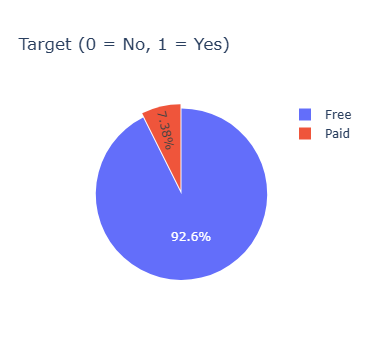

In [28]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

col = "Type"

grouped = data[col].value_counts().reset_index()
grouped.columns = [col, "count"]

# dynamic pull (pull first slice slightly)
pull = [0.05] + [0] * (len(grouped) - 1)

trace = go.Pie(
    labels=grouped[col],
    values=grouped["count"],
    pull=pull
)

layout = go.Layout(title="Target (0 = No, 1 = Yes)")

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [31]:
d1=play[play['Type']=='Free']
d2=play[play['Type']=='Paid']

# Why google like month of July most !?

C:\Users\pc\AppData\Local\Temp\ipykernel_1028\3081024548.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pc\AppData\Local\Temp\ipykernel_1028\3081024548.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



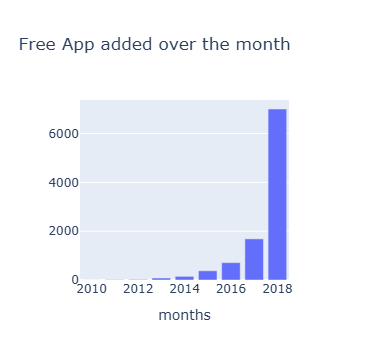

In [36]:
col='month_added'
col = 'year_added'

# ensure numeric
d1[col] = pd.to_numeric(d1[col], errors='coerce')
d2[col] = pd.to_numeric(d2[col], errors='coerce')

d1 = d1.dropna(subset=[col])
d2 = d2.dropna(subset=[col])

v1 = d1[col].value_counts().reset_index()
v1.columns = [col, 'count']
v1['count'] = v1['count'].astype(int)
v1 = v1.sort_values(col)

v2 = d2[col].value_counts().reset_index()
v2.columns = [col, 'count']
v2['count'] = v2['count'].astype(int)
v2 = v2.sort_values(col)

trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict())
layout={'title':"Free App added over the month",'xaxis':{'title':"months"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

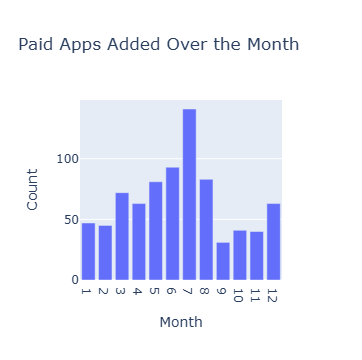

In [47]:
col = 'month_added'

v2 = d2[col].value_counts().reset_index()
v2.columns = [col, 'count']

# FORCE numeric (this is mandatory)
v2['count'] = pd.to_numeric(v2['count'], errors='coerce')

# VECTORISED percent calculation (NO apply, NO sum())
v2['percent'] = 100 * v2['count'] / v2['count'].sum()

# sort months alphabetically (safe for now)
v2 = v2.sort_values(col)

trace1 = go.Bar(
    x=v2[col].astype(str),   # ensure Plotly gets strings
    y=v2["count"],
    name="Paid"
)

layout = go.Layout(
    title="Paid Apps Added Over the Month",
    xaxis=dict(title="Month"),
    yaxis=dict(title="Count")
)

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)


# Is Google Bias ??

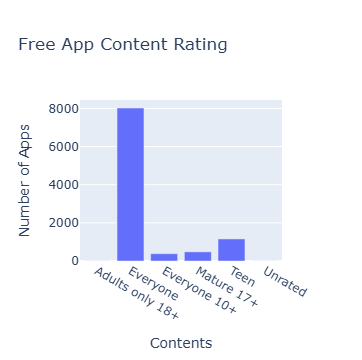

In [49]:
col = 'Content Rating'

v1 = d1[col].value_counts().reset_index()
v1.columns = [col, 'count']

v1['count'] = pd.to_numeric(v1['count'])
v1['percent'] = 100 * v1['count'] / v1['count'].sum()

v1 = v1.sort_values(col)

trace1 = go.Bar(
    x=v1[col],
    y=v1['count'],
    name="Free"
)

layout = {
    'title': "Free App Content Rating",
    'xaxis': {'title': "Contents"},
    'yaxis': {'title': "Number of Apps"}
}

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

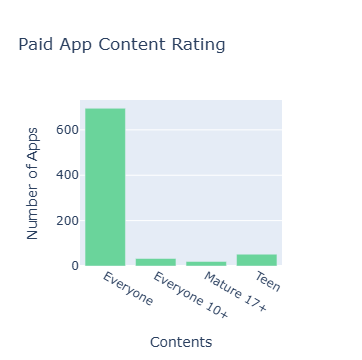

In [52]:
col = 'Content Rating'

v2 = d2[col].value_counts().reset_index()
v2.columns = [col, 'count']   # ✅ correct renaming

# make sure count is numeric
v2['count'] = pd.to_numeric(v2['count'])

# percentage (vectorized, no apply)
v2['percent'] = 100 * v2['count'] / v2['count'].sum()

v2 = v2.sort_values(col)

trace1 = go.Bar(
    x=v2[col],
    y=v2['count'],
    name="Paid",
    marker=dict(color="#6ad49b")
)

layout = {
    'title': "Paid App Content Rating",
    'xaxis': {'title': "Contents"},
    'yaxis': {'title': "Number of Apps"}
}

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)


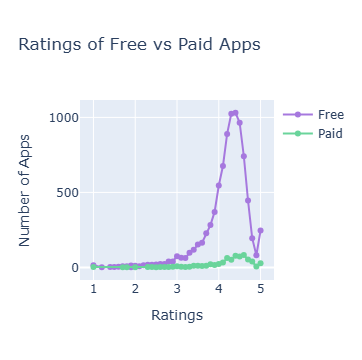

In [54]:
col = 'Rating'

# ---------- FREE APPS ----------
v1 = d1[col].dropna()
v1 = v1.value_counts().reset_index()
v1.columns = [col, 'count']

v1[col] = pd.to_numeric(v1[col])
v1['count'] = pd.to_numeric(v1['count'])
v1['percent'] = 100 * v1['count'] / v1['count'].sum()
v1 = v1.sort_values(col)

# ---------- PAID APPS ----------
v2 = d2[col].dropna()
v2 = v2.value_counts().reset_index()
v2.columns = [col, 'count']

v2[col] = pd.to_numeric(v2[col])
v2['count'] = pd.to_numeric(v2['count'])
v2['percent'] = 100 * v2['count'] / v2['count'].sum()
v2 = v2.sort_values(col)

# ---------- PLOT ----------
trace1 = go.Scatter(
    x=v1[col],
    y=v1['count'],
    mode='lines+markers',
    name="Free",
    marker=dict(color="#a678de")
)

trace2 = go.Scatter(
    x=v2[col],
    y=v2['count'],
    mode='lines+markers',
    name="Paid",
    marker=dict(color="#6ad49b")
)

layout = {
    'title': "Ratings of Free vs Paid Apps",
    'xaxis': {'title': "Ratings"},
    'yaxis': {'title': "Number of Apps"}
}

fig = go.Figure(data=[trace1, trace2], layout=layout)
iplot(fig)


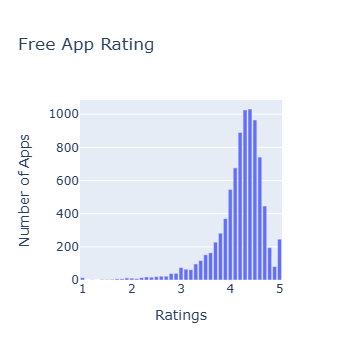

In [56]:
col = 'Rating'

v1 = d1[col].dropna()
v1 = v1.value_counts().reset_index()
v1.columns = [col, 'count']

# convert to numeric
v1[col] = pd.to_numeric(v1[col])
v1['count'] = pd.to_numeric(v1['count'])

# percentage (vectorized)
v1['percent'] = 100 * v1['count'] / v1['count'].sum()

# sort ratings properly
v1 = v1.sort_values(col)

trace1 = go.Bar(
    x=v1[col],
    y=v1["count"],
    name="Free"
)

layout = {
    'title': "Free App Rating",
    'xaxis': {'title': "Ratings"},
    'yaxis': {'title': "Number of Apps"}
}

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)


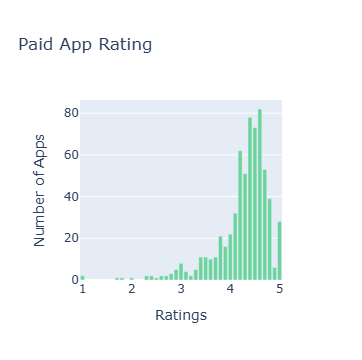

In [57]:
col = 'Rating'

v2 = d2[col].dropna()
v2 = v2.value_counts().reset_index()
v2.columns = [col, 'count']

# convert to numeric
v2[col] = pd.to_numeric(v2[col])
v2['count'] = pd.to_numeric(v2['count'])

# percentage
v2['percent'] = 100 * v2['count'] / v2['count'].sum()

# sort properly
v2 = v2.sort_values(col)

trace1 = go.Bar(
    x=v2[col],
    y=v2["count"],
    name="Paid",
    marker=dict(color="#6ad49b")
)

layout = {
    'title': "Paid App Rating",
    'xaxis': {'title': "Ratings"},
    'yaxis': {'title': "Number of Apps"}
}

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)


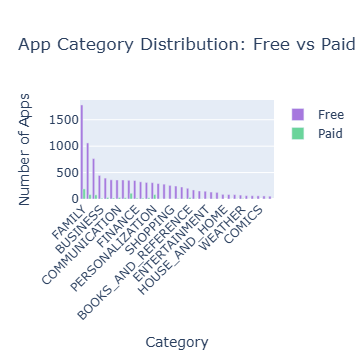

In [58]:
col = 'Category'

# Free apps
v1 = d1[col].value_counts().reset_index()
v1.columns = [col, 'count']
v1['Type'] = 'Free'

# Paid apps
v2 = d2[col].value_counts().reset_index()
v2.columns = [col, 'count']
v2['Type'] = 'Paid'

# Combine both
cat_df = pd.concat([v1, v2])

fig = go.Figure()

fig.add_bar(
    x=cat_df[cat_df['Type'] == 'Free'][col],
    y=cat_df[cat_df['Type'] == 'Free']['count'],
    name='Free',
    marker=dict(color="#a678de")
)

fig.add_bar(
    x=cat_df[cat_df['Type'] == 'Paid'][col],
    y=cat_df[cat_df['Type'] == 'Paid']['count'],
    name='Paid',
    marker=dict(color="#6ad49b")
)

fig.update_layout(
    title="App Category Distribution: Free vs Paid",
    xaxis_title="Category",
    yaxis_title="Number of Apps",
    barmode='group',
    xaxis_tickangle=-45
)

iplot(fig)


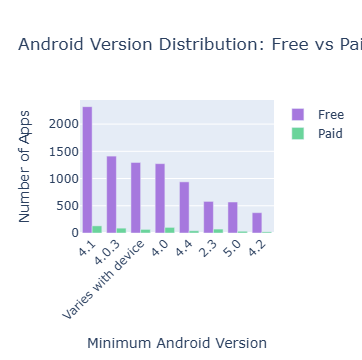

In [59]:
# ==============================
# Imports
# ==============================
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

# ==============================
# STEP 1: Clean Android Version
# ==============================
def clean_android_ver(x):
    if pd.isna(x):
        return 'Unknown'
    if 'Varies' in x:
        return 'Varies with device'
    return x.replace(' and up', '').strip()

# Apply cleaning
d1['Android Ver Clean'] = d1['Android Ver'].apply(clean_android_ver)
d2['Android Ver Clean'] = d2['Android Ver'].apply(clean_android_ver)

# ==============================
# STEP 2: Value Counts
# ==============================
col = 'Android Ver Clean'

v1 = d1[col].value_counts().reset_index()
v1.columns = [col, 'count']
v1['Type'] = 'Free'

v2 = d2[col].value_counts().reset_index()
v2.columns = [col, 'count']
v2['Type'] = 'Paid'

# Combine
df_ver = pd.concat([v1, v2], ignore_index=True)

# ==============================
# STEP 3: Keep Top Android Versions
# ==============================
top_versions = (
    df_ver.groupby(col)['count']
    .sum()
    .sort_values(ascending=False)
    .head(8)
    .index
)

df_ver = df_ver[df_ver[col].isin(top_versions)]

# ==============================
# STEP 4: Plot (Grouped Bar Chart)
# ==============================
fig = go.Figure()

fig.add_bar(
    x=df_ver[df_ver['Type'] == 'Free'][col],
    y=df_ver[df_ver['Type'] == 'Free']['count'],
    name='Free',
    marker=dict(color="#a678de")
)

fig.add_bar(
    x=df_ver[df_ver['Type'] == 'Paid'][col],
    y=df_ver[df_ver['Type'] == 'Paid']['count'],
    name='Paid',
    marker=dict(color="#6ad49b")
)

fig.update_layout(
    title="Android Version Distribution: Free vs Paid Apps",
    xaxis_title="Minimum Android Version",
    yaxis_title="Number of Apps",
    barmode='group',
    xaxis_tickangle=-45
)

iplot(fig)


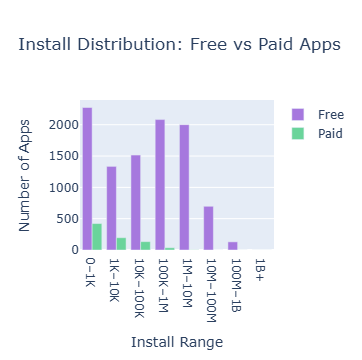

In [61]:
# =====================================
# Imports
# =====================================
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

# =====================================
# STEP 1: Clean Installs Column
# =====================================
def clean_installs(x):
    if pd.isna(x):
        return None
    x = str(x).replace(',', '').replace('+', '').strip()
    if x.isdigit():
        return int(x)
    return None

# Apply cleaning
d1['Installs_clean'] = d1['Installs'].apply(clean_installs)
d2['Installs_clean'] = d2['Installs'].apply(clean_installs)

# =====================================
# STEP 2: Remove Invalid Rows
# =====================================
d1_inst = d1.dropna(subset=['Installs_clean']).copy()
d2_inst = d2.dropna(subset=['Installs_clean']).copy()

# =====================================
# STEP 3: Create Install Ranges (Buckets)
# =====================================
bins = [
    0,
    1_000,
    10_000,
    100_000,
    1_000_000,
    10_000_000,
    100_000_000,
    1_000_000_000,
    float('inf')
]

labels = [
    '0–1K',
    '1K–10K',
    '10K–100K',
    '100K–1M',
    '1M–10M',
    '10M–100M',
    '100M–1B',
    '1B+'
]

d1_inst['Install Range'] = pd.cut(
    d1_inst['Installs_clean'],
    bins=bins,
    labels=labels
)

d2_inst['Install Range'] = pd.cut(
    d2_inst['Installs_clean'],
    bins=bins,
    labels=labels
)

# =====================================
# STEP 4: Count Apps per Install Range
# =====================================
v1 = (
    d1_inst['Install Range']
    .value_counts()
    .sort_index()
    .reset_index()
)
v1.columns = ['Install Range', 'count']

v2 = (
    d2_inst['Install Range']
    .value_counts()
    .sort_index()
    .reset_index()
)
v2.columns = ['Install Range', 'count']

# =====================================
# STEP 5: Plot – Grouped Bar Chart
# =====================================
fig = go.Figure()

fig.add_bar(
    x=v1['Install Range'],
    y=v1['count'],
    name='Free',
    marker=dict(color="#a678de")
)

fig.add_bar(
    x=v2['Install Range'],
    y=v2['count'],
    name='Paid',
    marker=dict(color="#6ad49b")
)

fig.update_layout(
    title="Install Distribution: Free vs Paid Apps",
    xaxis_title="Install Range",
    yaxis_title="Number of Apps",
    barmode='group'
)

iplot(fig)


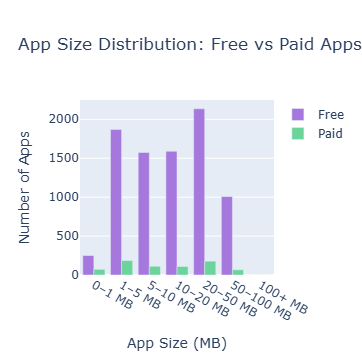

In [62]:
# =====================================
# Imports
# =====================================
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

# =====================================
# STEP 1: Clean Size Column
# =====================================
def clean_size(size):
    if pd.isna(size):
        return None

    size = str(size)

    if size == 'Varies with device':
        return None

    if size.endswith('M'):
        return float(size.replace('M', ''))

    if size.endswith('k'):
        return float(size.replace('k', '')) / 1024

    return None

# Apply cleaning
d1['Size_MB'] = d1['Size'].apply(clean_size)
d2['Size_MB'] = d2['Size'].apply(clean_size)

# =====================================
# STEP 2: Remove Invalid Rows
# =====================================
d1_size = d1.dropna(subset=['Size_MB']).copy()
d2_size = d2.dropna(subset=['Size_MB']).copy()

# =====================================
# STEP 3: Create Size Buckets (MB)
# =====================================
bins = [0, 1, 5, 10, 20, 50, 100, float('inf')]
labels = [
    '0–1 MB',
    '1–5 MB',
    '5–10 MB',
    '10–20 MB',
    '20–50 MB',
    '50–100 MB',
    '100+ MB'
]

d1_size['Size Range'] = pd.cut(
    d1_size['Size_MB'],
    bins=bins,
    labels=labels
)

d2_size['Size Range'] = pd.cut(
    d2_size['Size_MB'],
    bins=bins,
    labels=labels
)

# =====================================
# STEP 4: Count Apps per Size Range
# =====================================
v1 = (
    d1_size['Size Range']
    .value_counts()
    .sort_index()
    .reset_index()
)
v1.columns = ['Size Range', 'count']

v2 = (
    d2_size['Size Range']
    .value_counts()
    .sort_index()
    .reset_index()
)
v2.columns = ['Size Range', 'count']

# =====================================
# STEP 5: Plot – Grouped Bar Chart
# =====================================
fig = go.Figure()

fig.add_bar(
    x=v1['Size Range'],
    y=v1['count'],
    name='Free',
    marker=dict(color="#a678de")
)

fig.add_bar(
    x=v2['Size Range'],
    y=v2['count'],
    name='Paid',
    marker=dict(color="#6ad49b")
)

fig.update_layout(
    title="App Size Distribution: Free vs Paid Apps",
    xaxis_title="App Size (MB)",
    yaxis_title="Number of Apps",
    barmode='group'
)

iplot(fig)


# Rating

In [63]:
d3=play[play['Rating']==4.5]
d4=play[play['Rating']==4]

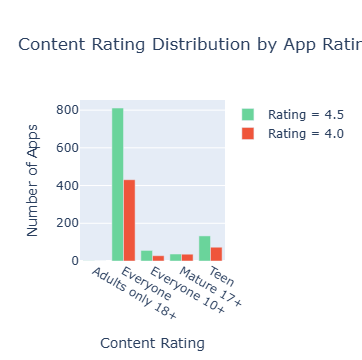

In [65]:
# =====================================
# Imports
# =====================================
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

# =====================================
# STEP 1: Value Counts
# =====================================
col = 'Content Rating'

v1 = d3[col].value_counts().reset_index()
v1.columns = [col, 'count']

v2 = d4[col].value_counts().reset_index()
v2.columns = [col, 'count']

# =====================================
# STEP 2: Combine Categories (important)
# =====================================
all_contents = sorted(set(v1[col]).union(set(v2[col])))

v1 = v1.set_index(col).reindex(all_contents, fill_value=0).reset_index()
v2 = v2.set_index(col).reindex(all_contents, fill_value=0).reset_index()

# =====================================
# STEP 3: Plot – Grouped Bar Chart
# =====================================
fig = go.Figure()

fig.add_bar(
    x=v1[col],
    y=v1['count'],
    name='Rating = 4.5',
    marker=dict(color="#6ad49b")
)

fig.add_bar(
    x=v2[col],
    y=v2['count'],
    name='Rating = 4.0'
)

fig.update_layout(
    title="Content Rating Distribution by App Rating",
    xaxis_title="Content Rating",
    yaxis_title="Number of Apps",
    barmode='group'
)

iplot(fig)


C:\Users\pc\AppData\Local\Temp\ipykernel_1028\2856491534.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pc\AppData\Local\Temp\ipykernel_1028\2856491534.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



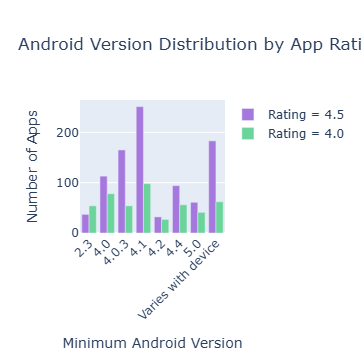

In [66]:
# =====================================
# Imports
# =====================================
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

# =====================================
# STEP 1: Clean Android Version
# =====================================
def clean_android_ver(x):
    if pd.isna(x):
        return 'Unknown'
    if 'Varies' in str(x):
        return 'Varies with device'
    return str(x).replace(' and up', '').strip()

d3['Android Ver Clean'] = d3['Android Ver'].apply(clean_android_ver)
d4['Android Ver Clean'] = d4['Android Ver'].apply(clean_android_ver)

# =====================================
# STEP 2: Value Counts
# =====================================
col = 'Android Ver Clean'

v1 = d3[col].value_counts().reset_index()
v1.columns = [col, 'count']

v2 = d4[col].value_counts().reset_index()
v2.columns = [col, 'count']

# =====================================
# STEP 3: Align Versions
# =====================================
all_versions = sorted(set(v1[col]).union(set(v2[col])))

v1 = v1.set_index(col).reindex(all_versions, fill_value=0).reset_index()
v2 = v2.set_index(col).reindex(all_versions, fill_value=0).reset_index()

# =====================================
# STEP 4: Keep Top Versions (clean visual)
# =====================================
top_versions = (
    v1.set_index(col)['count'] + v2.set_index(col)['count']
).sort_values(ascending=False).head(8).index

v1 = v1[v1[col].isin(top_versions)]
v2 = v2[v2[col].isin(top_versions)]

# =====================================
# STEP 5: Plot – Grouped Bar Chart
# =====================================
fig = go.Figure()

fig.add_bar(
    x=v1[col],
    y=v1['count'],
    name='Rating = 4.5',
    marker=dict(color="#a678de")
)

fig.add_bar(
    x=v2[col],
    y=v2['count'],
    name='Rating = 4.0',
    marker=dict(color="#6ad49b")
)

fig.update_layout(
    title="Android Version Distribution by App Rating",
    xaxis_title="Minimum Android Version",
    yaxis_title="Number of Apps",
    barmode='group',
    xaxis_tickangle=-45
)

iplot(fig)


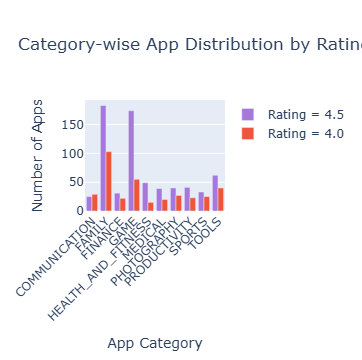

In [67]:
# =====================================
# Imports
# =====================================
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

# =====================================
# STEP 1: Value Counts
# =====================================
col = 'Category'

v1 = d3[col].value_counts().reset_index()
v1.columns = [col, 'count']

v2 = d4[col].value_counts().reset_index()
v2.columns = [col, 'count']

# =====================================
# STEP 2: Align Categories
# =====================================
all_categories = sorted(set(v1[col]).union(set(v2[col])))

v1 = v1.set_index(col).reindex(all_categories, fill_value=0).reset_index()
v2 = v2.set_index(col).reindex(all_categories, fill_value=0).reset_index()

# =====================================
# STEP 3: Keep Top Categories (Readable Chart)
# =====================================
top_categories = (
    v1.set_index(col)['count'] + v2.set_index(col)['count']
).sort_values(ascending=False).head(10).index

v1 = v1[v1[col].isin(top_categories)]
v2 = v2[v2[col].isin(top_categories)]

# =====================================
# STEP 4: Plot – Grouped Bar Chart
# =====================================
fig = go.Figure()

fig.add_bar(
    x=v1[col],
    y=v1['count'],
    name='Rating = 4.5',
    marker=dict(color="#a678de")
)

fig.add_bar(
    x=v2[col],
    y=v2['count'],
    name='Rating = 4.0'
)

fig.update_layout(
    title="Category-wise App Distribution by Rating",
    xaxis_title="App Category",
    yaxis_title="Number of Apps",
    barmode='group',
    xaxis_tickangle=-45
)

iplot(fig)


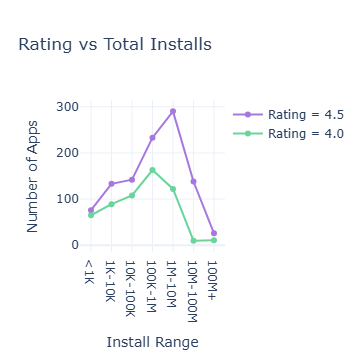

In [68]:
# =====================================
# Imports
# =====================================
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd

init_notebook_mode(connected=True)

# =====================================
# STEP 1: Clean Installs column
# =====================================
def clean_installs(df):
    df = df.copy()
    df['Installs'] = (
        df['Installs']
        .str.replace('+', '', regex=False)
        .str.replace(',', '', regex=False)
        .astype(int)
    )
    return df

d3_clean = clean_installs(d3)
d4_clean = clean_installs(d4)

# =====================================
# STEP 2: Bin Installs (VERY IMPORTANT)
# =====================================
bins = [0, 1_000, 10_000, 100_000, 1_000_000, 10_000_000, 100_000_000, 1_000_000_000]
labels = ['<1K', '1K-10K', '10K-100K', '100K-1M', '1M-10M', '10M-100M', '100M+']

d3_clean['Install_Bucket'] = pd.cut(d3_clean['Installs'], bins=bins, labels=labels)
d4_clean['Install_Bucket'] = pd.cut(d4_clean['Installs'], bins=bins, labels=labels)

# =====================================
# STEP 3: Value Counts
# =====================================
v1 = d3_clean['Install_Bucket'].value_counts().sort_index().reset_index()
v1.columns = ['Installs', 'count']

v2 = d4_clean['Install_Bucket'].value_counts().sort_index().reset_index()
v2.columns = ['Installs', 'count']

# =====================================
# STEP 4: Plot Line Chart
# =====================================
trace1 = go.Scatter(
    x=v1['Installs'],
    y=v1['count'],
    name='Rating = 4.5',
    mode='lines+markers',
    marker=dict(color="#a678de")
)

trace2 = go.Scatter(
    x=v2['Installs'],
    y=v2['count'],
    name='Rating = 4.0',
    mode='lines+markers',
    marker=dict(color="#6ad49b")
)

fig = go.Figure(data=[trace1, trace2])

fig.update_layout(
    title="Rating vs Total Installs",
    xaxis_title="Install Range",
    yaxis_title="Number of Apps",
    template="plotly_white"
)

iplot(fig)


# Data Cleaning

In [72]:
# Check total missing values before dropping
print("Total null values before:", data.isnull().sum().sum())

# Drop all rows containing at least one null value
data.dropna(inplace=True)

# Verify after dropping
print("Total null values after:", data.isnull().sum().sum())
print("Shape after dropping nulls:", data.shape)


Total null values before: 1487
Total null values after: 0
Shape after dropping nulls: (9360, 17)


# Creating Dummy Variables

In [73]:
data.head(2)

App        Category Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN    4.1   
1                             Coloring book moana  ART_AND_DESIGN    3.9   

  Reviews Size  Installs  Type Price Content Rating  \
0     159  19M   10,000+  Free     0       Everyone   
1     967  14M  500,000+  Free     0       Everyone   

                      Genres Last Updated Current Ver   Android Ver  \
0               Art & Design   2018-01-07       1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15       2.0.0  4.0.3 and up   

   year_addded  month_addded  year_added  month_added  
0         2018             1        2018            1  
1         2018             1        2018            1

In [74]:
catgry=pd.get_dummies(data['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(data['Type'],prefix='typ',drop_first=True)
cr=pd.get_dummies(data['Content Rating'],prefix='cr',drop_first=True)
frames=[data,catgry,typ,cr]
data=pd.concat(frames,axis=1)
data.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)

In [75]:
data.drop(['App','Size','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [76]:
data.head()

Rating Reviews  year_addded  month_addded  year_added  month_added  \
0    4.1     159         2018             1        2018            1   
1    3.9     967         2018             1        2018            1   
2    4.7   87510         2018             8        2018            8   
3    4.5  215644         2018             6        2018            6   
4    4.3     967         2018             6        2018            6   

   catg_AUTO_AND_VEHICLES  catg_BEAUTY  catg_BOOKS_AND_REFERENCE  \
0                   False        False                     False   
1                   False        False                     False   
2                   False        False                     False   
3                   False        False                     False   
4                   False        False                     False   

   catg_BUSINESS  ...  catg_TOOLS  catg_TRAVEL_AND_LOCAL  catg_VIDEO_PLAYERS  \
0          False  ...       False                  False               False   
1          False  ...       False                  False               False   
2          False  ...       False                  False               False   
3          False  ...       False                  False               False   
4          False  ...       False                  False               False   

   catg_WEATHER  typ_Paid  cr_Everyone  cr_Everyone 10+  cr_Mature 17+  \
0         False     False         True            False          False   
1         False     False         True            False          False   
2         False     False         True            False          False   
3         False     False        False            False          False   
4         False     False         True            False          False   

   cr_Teen  cr_Unrated  
0    False       False  
1    False       False  
2    False       False  
3     True       False  
4    False       False  

[5 rows x 44 columns]

# Feature selection

In [77]:
X=data.drop('Rating',axis=1)
y=data['Rating'].values
y=y.astype('int')

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

# Training & Testing of Model

Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [80]:
#LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression_accuracy: 0.7617521367521367


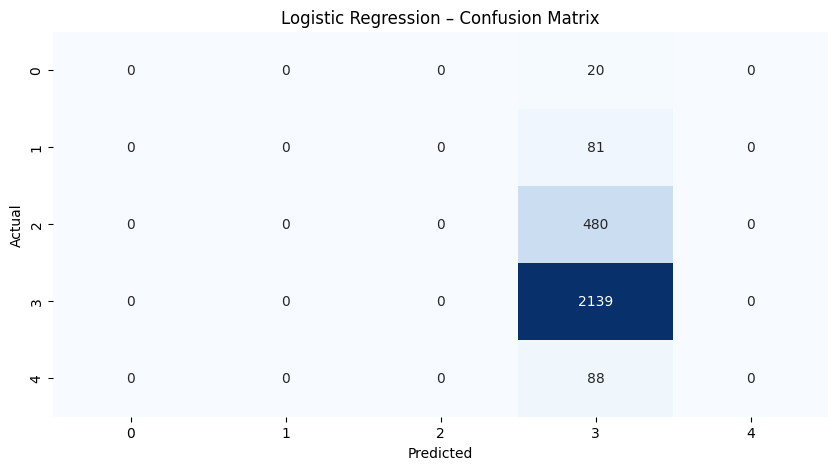

In [84]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


DecisionTree Classifier

A decision tree classifier is a tree in which internal nodes are labeled by features. The classifier categorizes an object xi by recursively testing for the weights that the features labeling the internal nodes have in vector xi, until a leaf node is reached. The label of this node is then assigned to xi

In [86]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_cm
dtree_ac=accuracy_score(dtree_pred,y_test)
dtree_ac

0.6830484330484331

DecisionTree_Classifier_accuracy: 0.6830484330484331


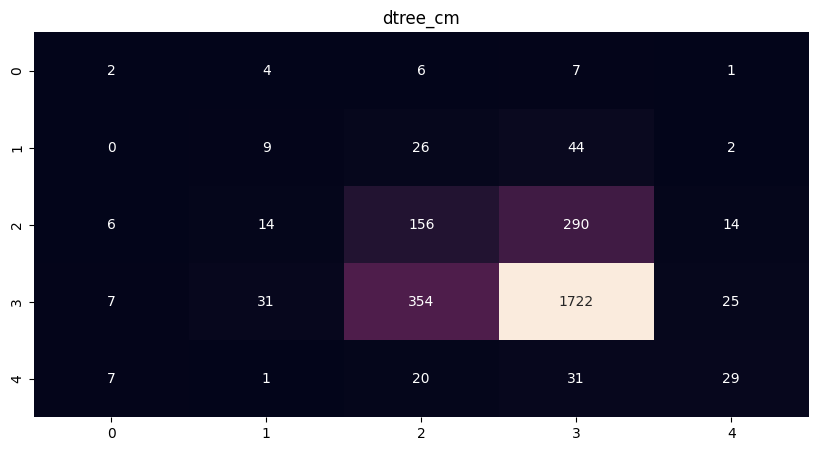

In [87]:
plt.figure(figsize=(10,5))
plt.title("dtree_cm")
sns.heatmap(dtree_cm,annot=True,fmt="d",cbar=False)
print('DecisionTree_Classifier_accuracy:',dtree_ac)

SVM regressor

As the name suggest the SVR is an regression algorithm , so we can use SVR for working with continuous Values instead of Classification which is SVM

In [90]:
#SVM regressor
from sklearn.svm import SVC
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

SVM_regressor_accuracy: 0.7617521367521367


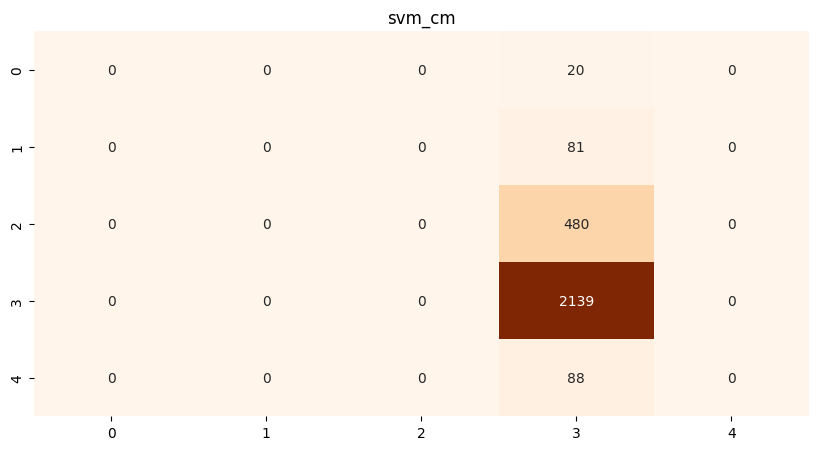

In [91]:
plt.figure(figsize=(10,5))
plt.title("svm_cm")
sns.heatmap(svr_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
print('SVM_regressor_accuracy:',svr_ac)

RandomForest

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree

In [93]:
#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

RandomForest_accuracy: 0.7254273504273504


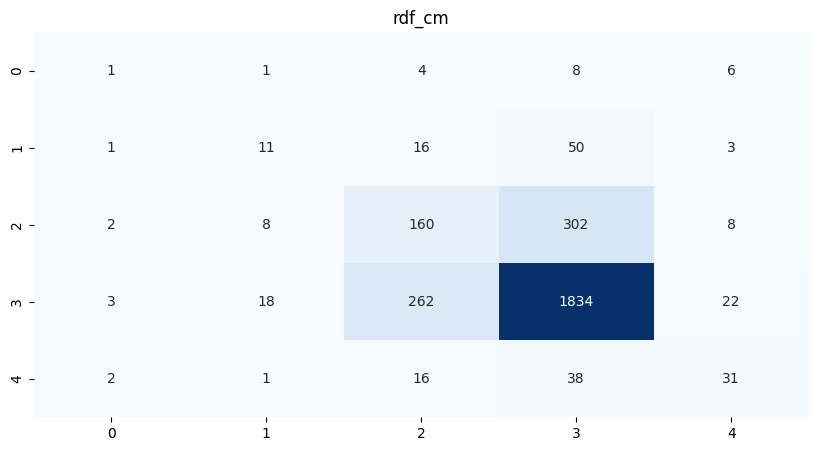

In [94]:
plt.figure(figsize=(10,5))
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

Text(0.5, 1.0, 'Model Accuracy')

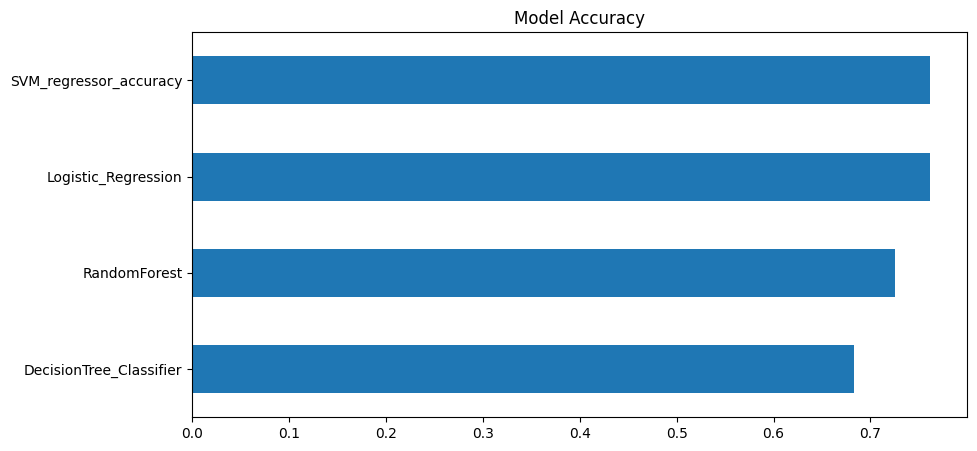

In [95]:
%matplotlib inline
model_accuracy = pd.Series(data=[lr_ac,dtree_ac,svr_ac,rdf_ac], 
        index=['Logistic_Regression','DecisionTree_Classifier','SVM_regressor_accuracy','RandomForest'])
fig= plt.figure(figsize=(10,5))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

Summary

In this notebook we use pandas, numpy, pandas profiling for data preprocessiong and for visualization we use matplotlib, seaborn and mostly plotly. By working on the google playstore data we conclude that most of the apps are free and their category are related to family, gaming and certains tools. Most of the content of these apps are for everyone. Most of the people pay for the category of family and medical apps. Here we use different machine learning model to predict the app ratings and also compare the model performence.